In [1]:
#calling the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
names = ['Loan_Id','Gender','Married','Dependents','Education','Self_employed','Applicant_income','Coapplicant_income','Loan_amount','Loan_term','Credit_history', 'Property_area', 'Loan_status']
df.columns = names
# renaming the columns

In [4]:
df.columns

Index(['Loan_Id', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_employed', 'Applicant_income', 'Coapplicant_income',
       'Loan_amount', 'Loan_term', 'Credit_history', 'Property_area',
       'Loan_status'],
      dtype='object')

In [5]:
df.head()

,Loan_Id,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Coapplicant_income,Loan_amount,Loan_term,Credit_history,Property_area,Loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_Id             613 non-null    object 
 1   Gender              600 non-null    object 
 2   Married             610 non-null    object 
 3   Dependents          598 non-null    object 
 4   Education           613 non-null    object 
 5   Self_employed       581 non-null    object 
 6   Applicant_income    613 non-null    int64  
 7   Coapplicant_income  613 non-null    float64
 8   Loan_amount         592 non-null    float64
 9   Loan_term           599 non-null    float64
 10  Credit_history      563 non-null    float64
 11  Property_area       613 non-null    object 
 12  Loan_status         613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
df.Loan_status.value_counts(normalize=True)
# to see the frequency of each value

Y    0.686786
N    0.313214
Name: Loan_status, dtype: float64

<Axes: >

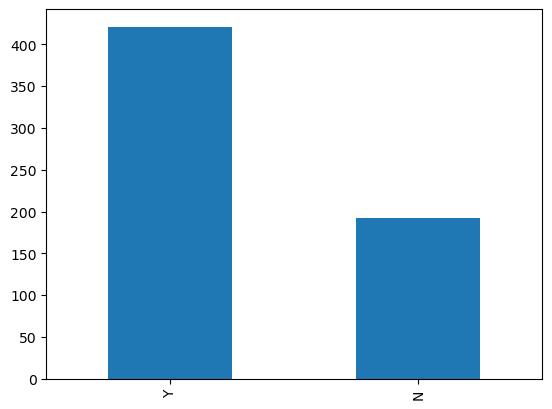

In [9]:
df.Loan_status.value_counts().plot.bar()

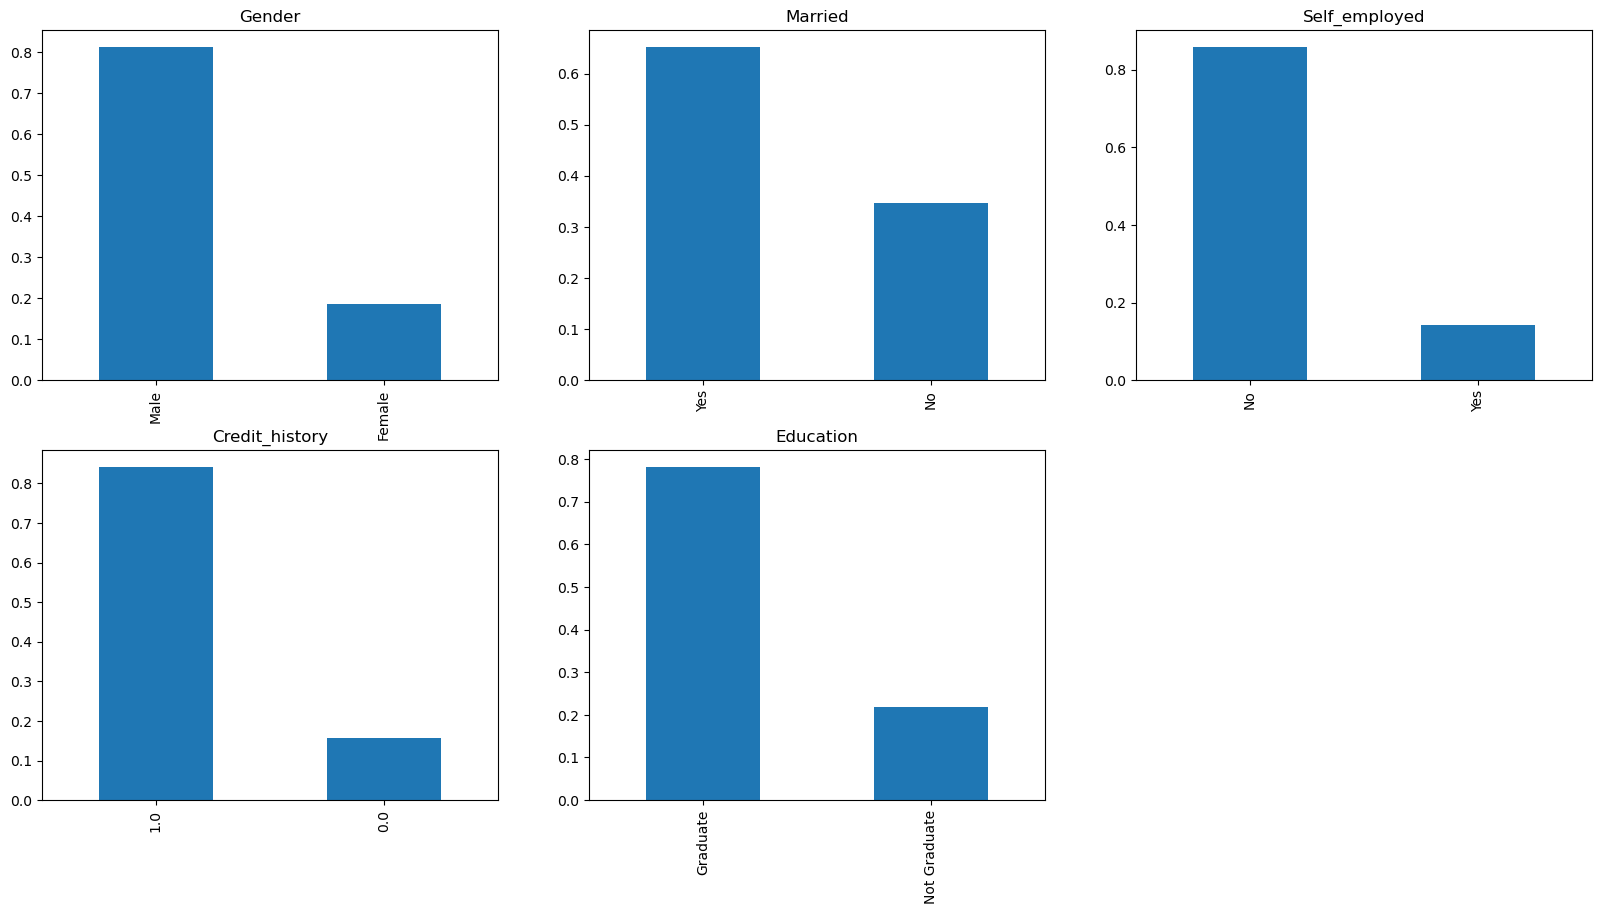

In [10]:
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_employed'].value_counts(normalize=True).plot.bar(title= 'Self_employed')

plt.subplot(234)
df['Credit_history'].value_counts(normalize=True).plot.bar(title= 'Credit_history')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

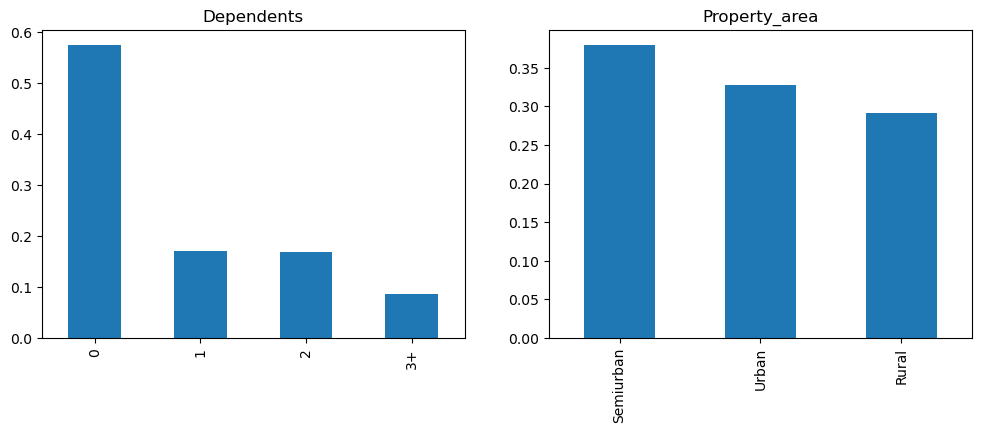

In [11]:
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_area'].value_counts(normalize=True).plot.bar(title= 'Property_area')

plt.show()

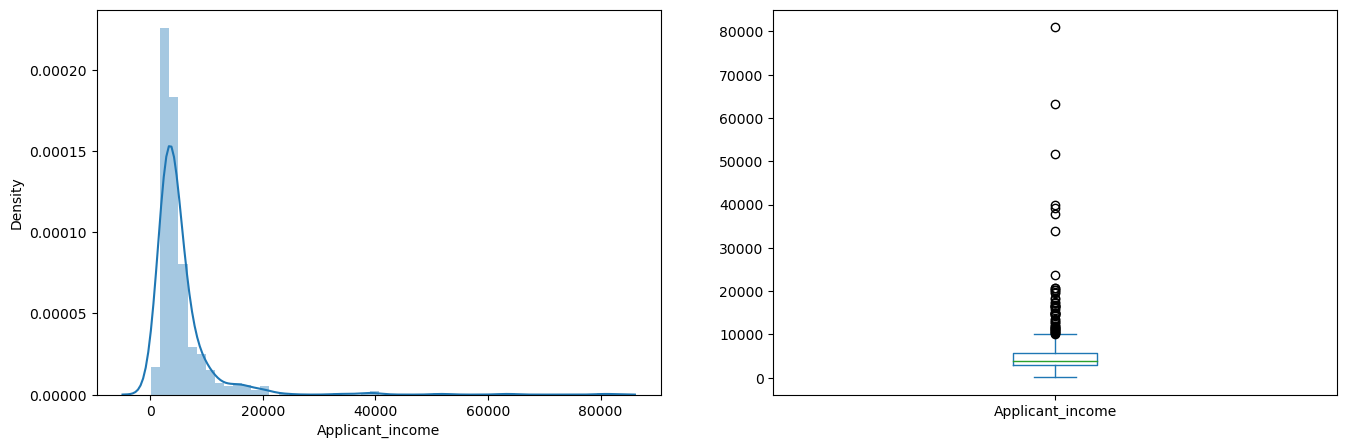

In [12]:
plt.subplot(121)
sns.distplot(df['Applicant_income']);

plt.subplot(122)
df['Applicant_income'].plot.box(figsize=(16,5))

plt.show()

In [13]:
df['Loan_term'].value_counts()


360.0    511
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_term, dtype: int64

In [15]:
df['Dependents'].replace('3+', 3, inplace=True)
# replacing number of dependents'3+' as 3

In [18]:
df.isnull().sum()

Loan_Id                0
Gender                13
Married                3
Dependents            15
Education              0
Self_employed         32
Applicant_income       0
Coapplicant_income     0
Loan_amount           21
Loan_term             14
Credit_history        50
Property_area          0
Loan_status            0
dtype: int64

In [19]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_employed'].fillna(df['Self_employed'].mode()[0], inplace=True)
df['Credit_history'].fillna(df['Credit_history'].mode()[0], inplace=True)

In [20]:
df['Loan_term'].value_counts()

360.0    511
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_term, dtype: int64

In [21]:
df['Loan_term'].fillna(df['Loan_term'].mode()[0], inplace=True)

In [22]:
df['Loan_amount'].fillna(df['Loan_amount'].median(), inplace=True)

In [23]:
df.isnull().sum()

Loan_Id               0
Gender                0
Married               0
Dependents            0
Education             0
Self_employed         0
Applicant_income      0
Coapplicant_income    0
Loan_amount           0
Loan_term             0
Credit_history        0
Property_area         0
Loan_status           0
dtype: int64

In [24]:
df.dtypes

Loan_Id                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_employed          object
Applicant_income        int64
Coapplicant_income    float64
Loan_amount           float64
Loan_term             float64
Credit_history        float64
Property_area          object
Loan_status             int64
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Property_area'] = le.fit_transform(df['Property_area'])
df['Loan_status'] = le.fit_transform(df['Loan_status'])

In [26]:
df.head()

,Loan_Id,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Coapplicant_income,Loan_amount,Loan_term,Credit_history,Property_area,Loan_status
0,LP001003,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,2,1
4,LP001011,1,1,2,0,Yes,5417,4196.0,267.0,360.0,1.0,2,1


In [27]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
# chaning all object data type to integer

In [28]:
for col_name in df.columns:
    if(df[col_name].dtype == 'float'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
# changing all float datatypes to integer

In [29]:
df.dtypes

Loan_Id               int16
Gender                int32
Married               int32
Dependents             int8
Education             int32
Self_employed          int8
Applicant_income      int64
Coapplicant_income    int16
Loan_amount           int16
Loan_term              int8
Credit_history         int8
Property_area         int32
Loan_status           int64
dtype: object

In [30]:
df.skew()

Loan_Id               0.000000
Gender               -1.646215
Married              -0.649810
Dependents            0.658709
Education             1.365098
Self_employed         2.157034
Applicant_income      6.534654
Coapplicant_income    0.778458
Loan_amount           0.500333
Loan_term            -3.313316
Credit_history       -2.019265
Property_area        -0.063379
Loan_status          -0.807437
dtype: float64

In [31]:
for index in df.skew().index:
    if df.skew().loc[index] > 0.5:
        df[index] = np.cbrt(df[index])
        if df.skew().loc[index] < -0.5 :
            df[index] = np.square(df[index])
# applying cuberoot transformation to all columns with skewness more than 0.5 and square transformation to columns with skewness less than -0.5

In [32]:
df.skew()
# some skewness has been reduced still few columns are showing some amount of skewness

Loan_Id               0.000000
Gender               -1.646215
Married              -0.649810
Dependents           -0.123230
Education             1.365098
Self_employed         2.156250
Applicant_income      2.084461
Coapplicant_income    0.067682
Loan_amount           0.010143
Loan_term            -3.313316
Credit_history       -2.019265
Property_area        -0.063379
Loan_status          -0.807437
dtype: float64

In [33]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 13,  67,  93, 125, 132, 154, 170, 182, 184, 241, 261, 312, 332,
       408, 442, 494, 496, 545, 574, 584], dtype=int64), array([9, 9, 9, 6, 9, 6, 6, 6, 6, 9, 9, 9, 6, 6, 6, 9, 9, 9, 9, 9],
      dtype=int64))


In [34]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

dfnew.shape= (593, 13)


In [35]:
df=dfnew

In [36]:
cor= df.corr()
cor
# only credit history is showing some significant amount of correlation with loanstatus

,Loan_Id,Gender,Married,Dependents,Education,Self_employed,Applicant_income,Coapplicant_income,Loan_amount,Loan_term,Credit_history,Property_area,Loan_status
Loan_Id,1.000000,-0.022594,-0.017387,0.013302,0.042515,0.046933,0.039918,-0.039139,0.030663,-0.031797,-0.030508,-0.152010,0.025399
Gender,-0.022594,1.000000,0.369533,0.057599,0.044969,-0.006819,0.054331,0.221139,0.157842,-0.086971,0.010566,-0.030139,0.012250
Married,-0.017387,0.369533,1.000000,0.176680,0.023267,-0.008084,0.003462,0.291105,0.187720,-0.111940,0.016305,0.007327,0.089258
Dependents,0.013302,0.057599,0.176680,1.000000,-0.011746,0.061175,0.031288,0.040564,0.050724,0.007008,0.024825,0.075694,0.050425
Education,0.042515,0.044969,0.023267,-0.011746,1.000000,-0.014805,-0.185553,0.015141,-0.150641,-0.100286,-0.077901,-0.068061,-0.084767
Self_employed,0.046933,-0.006819,-0.008084,0.061175,-0.014805,1.000000,0.232322,-0.078520,0.135861,-0.010855,-0.007847,-0.028481,-0.015066
Applicant_income,0.039918,0.054331,0.003462,0.031288,-0.185553,0.232322,1.000000,-0.334430,0.482384,-0.011025,0.046884,-0.026946,0.000175
Coapplicant_income,-0.039139,0.221139,0.291105,0.040564,0.015141,-0.078520,-0.334430,1.000000,0.224535,-0.018157,-0.005451,-0.076717,0.043318
Loan_amount,0.030663,0.157842,0.187720,0.050724,-0.150641,0.135861,0.482384,0.224535,1.000000,0.060280,0.009112,-0.096370,-0.035462
Loan_term,-0.031797,-0.086971,-0.111940,0.007008,-0.100286,-0.010855,-0.011025,-0.018157,0.060280,1.000000,0.039746,-0.070526,0.007542


<Axes: >

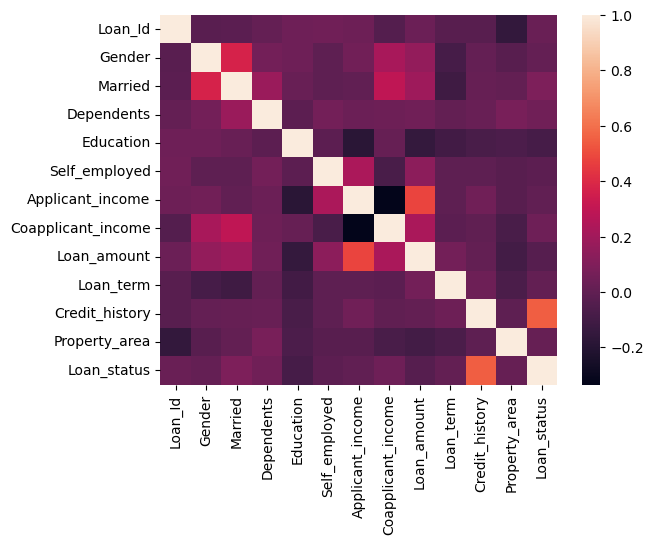

In [37]:
sns.heatmap(cor)

In [38]:
cor['Loan_status'].sort_values(ascending=False)

Loan_status           1.000000
Credit_history        0.549435
Married               0.089258
Dependents            0.050425
Coapplicant_income    0.043318
Loan_Id               0.025399
Property_area         0.018379
Gender                0.012250
Loan_term             0.007542
Applicant_income      0.000175
Self_employed        -0.015066
Loan_amount          -0.035462
Education            -0.084767
Name: Loan_status, dtype: float64

In [39]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,3.993062,Loan_Id
1,6.381406,Gender
2,3.666331,Married
3,6.175460,Dependents
4,1.314262,Education
5,1.222771,Self_employed
6,37.965657,Applicant_income
7,3.150485,Coapplicant_income
8,14.487879,Loan_amount
9,32.535603,Loan_term


In [41]:
x.drop('Applicant_income', axis=1, inplace=True)
x.drop('Loan_term', axis=1, inplace=True)
x.drop('Loan_Id', axis=1, inplace=True)

In [42]:
x

,Gender,Married,Dependents,Education,Self_employed,Coapplicant_income,Loan_amount,Credit_history,Property_area
0,1,1,1.586914,0.0,0.0,3.914868,18.720757,1,0
1,1,1,1.000000,0.0,1.0,0.000000,8.776381,1,2
2,1,1,1.000000,1.0,0.0,5.428835,17.466877,1,2
3,1,0,1.000000,0.0,0.0,0.000000,20.673717,1,2
4,1,1,2.080078,0.0,1.0,6.223084,30.446648,1,2
...,...,...,...,...,...,...,...,...,...
608,0,0,1.000000,0.0,0.0,0.000000,9.439131,1,0
609,1,1,0.000000,0.0,0.0,0.000000,3.659306,1,0
610,1,1,1.586914,0.0,0.0,1.442250,29.717344,1,2
611,1,1,2.080078,0.0,0.0,0.000000,25.924831,1,2


In [43]:
y.value_counts()

1    406
0    187
Name: Loan_status, dtype: int64

In [44]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [45]:
y1.value_counts()

0    406
1    406
Name: Loan_status, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size=0.20, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred= RFR.predict(x_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRs= i
print('Best Accuracy is:',maxAccu, 'at random_state',maxRs)


Best Accuracy is: 0.8773006134969326 at random_state 9


In [48]:
# creating Train, Test Split:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=maxRs)

In [49]:
# CLASSIFIACTION ALGORITHMS:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [50]:
# RandomForest Classifier:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.773109243697479
[[22 18]
 [ 9 70]]
              precision    recall  f1-score   support

           0       0.71      0.55      0.62        40
           1       0.80      0.89      0.84        79

    accuracy                           0.77       119
   macro avg       0.75      0.72      0.73       119
weighted avg       0.77      0.77      0.76       119



In [51]:
#Logistic Regression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))


0.8151260504201681
[[18 22]
 [ 0 79]]
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        40
           1       0.78      1.00      0.88        79

    accuracy                           0.82       119
   macro avg       0.89      0.72      0.75       119
weighted avg       0.86      0.82      0.79       119



In [52]:
# Support Vector Machine Classifier:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.6638655462184874
[[ 0 40]
 [ 0 79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.66      1.00      0.80        79

    accuracy                           0.66       119
   macro avg       0.33      0.50      0.40       119
weighted avg       0.44      0.66      0.53       119



In [53]:
# GradientBoosting Classifier:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7815126050420168
[[16 24]
 [ 2 77]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        40
           1       0.76      0.97      0.86        79

    accuracy                           0.78       119
   macro avg       0.83      0.69      0.70       119
weighted avg       0.80      0.78      0.75       119



In [54]:
#Adaboost Classifier:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8403361344537815
[[21 19]
 [ 0 79]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        40
           1       0.81      1.00      0.89        79

    accuracy                           0.84       119
   macro avg       0.90      0.76      0.79       119
weighted avg       0.87      0.84      0.82       119



In [55]:
#Bagging Classifier:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
predBG=BG.predict(x_test)
print(accuracy_score(y_test,predBG))
print(confusion_matrix(y_test,predBG))
print(classification_report(y_test,predBG))

0.8151260504201681
[[24 16]
 [ 6 73]]
              precision    recall  f1-score   support

           0       0.80      0.60      0.69        40
           1       0.82      0.92      0.87        79

    accuracy                           0.82       119
   macro avg       0.81      0.76      0.78       119
weighted avg       0.81      0.82      0.81       119



In [56]:
#ExtraTreesClassifier:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7310924369747899
[[22 18]
 [14 65]]
              precision    recall  f1-score   support

           0       0.61      0.55      0.58        40
           1       0.78      0.82      0.80        79

    accuracy                           0.73       119
   macro avg       0.70      0.69      0.69       119
weighted avg       0.73      0.73      0.73       119



In [57]:
# cross validation (CV) score: for Logistic Regression
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation is-', accuracy_score(y_test,predLR)-score.mean())

[0.70552147 0.71779141 0.80864198 0.77160494 0.81481481]
0.763674922366129
Difference between Accuracy score and Cross Validation is- 0.051451128054039064


In [58]:
# cross validation (CV) score: for Adaboost classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation is-', accuracy_score(y_test,predABC)-score.mean())

[0.6809816  0.73006135 0.83950617 0.85185185 0.85802469]
0.7920851321669318
Difference between Accuracy score and Cross Validation is- 0.04825100228684975


In [59]:
# cross validation (CV) score: for Bagging classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(BG,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation is-', accuracy_score(y_test,predBG)-score.mean())

[0.74233129 0.74233129 0.80246914 0.83333333 0.83333333]
0.7907596758312506
Difference between Accuracy score and Cross Validation is- 0.02436637458891744


In [67]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entrophy'], [estimator=None, n_estimators=50, Learning_rate=1.0, algorithm='SAMME', random_state=None]}

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3772351634.py, line 2)

In [61]:
GCV=GridSearchCV(AdaBoostClassifier(), parameters, cv=5)

In [62]:
GCV.fit(x_train,y_train)

ValueError: Invalid parameter 'criterion' for estimator AdaBoostClassifier(). Valid parameters are: ['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].